In [21]:
import numpy as np
def otsu_thresholding(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    #leere Liste für alle within class variances erstellen
    variance_list = list()
    var_obj_list = list()
    var_back_list = list()
    var_sum_back_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        
        #within class variance herausfinden
        
        #definieren von w0 und Hintergrund Mittelwert
        sum_back = 0 
        mean_sum_back = 0
        for i in range(0,T):
            sum_back += counts[i]
            mean_sum_back += counts[i] * bins[i]

        w0 = sum_back / sum(counts)
        mean_back = mean_sum_back / sum_back


        #definieren von w1 und Vordergrund Mittelwert
        sum_obj = 0
        mean_sum_obj = 0

        for j in range(T,len(counts)):
            sum_obj += counts[j]
            mean_sum_obj += counts[j] * bins[j]

        w1 = sum_obj / sum(counts)
        mean_obj = mean_sum_obj / sum_obj

        #Varianz Hintergrund
        var_sum_back = 0
        for k in range(0, T):
            var_sum_back += counts[k] * (bins[k] - mean_back)**2 

        var_back = var_sum_back / sum_back

        #Varianz Vordergrund
        var_sum_obj = 0
        for l in range(T, len(counts)):
            var_sum_obj += counts[l] * (bins[l] - mean_obj)**2 

        var_obj = var_sum_obj / sum_obj

        # Within Class Varianz berechnen
        within_class_varianz = w0 * var_back + w1 * var_obj
        
        #within class variance zu Liste hinzufügen
        variance_list.append(within_class_varianz)

        ####
        var_obj_list.append(var_obj)
        var_back_list.append(var_back)
        var_sum_back_list.append(var_sum_back)
    print(len(var_sum_back_list))
    
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            THRESH = round(bins[m])

    print(minvar)
    print(THRESH)
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

3855
4200.616634065529
33493


/Users/anna-lena/mambaforge/envs/compmeth2022/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


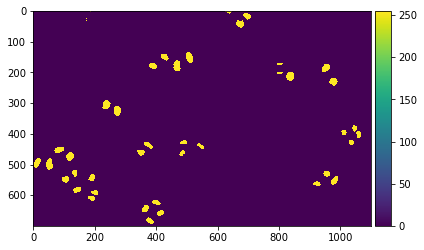

In [33]:
from skimage import io
img1 = io.imread('../BilderDaten/BilderDaten/N2DL-HeLa/img/t13.tif')
io.imshow(otsu_thresholding(img1))

In [31]:
#otsu vektorisiert
import numpy as np

def otsu_thresholding_vek(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    sum_back = np.cumsum(counts)[:-1]
    sum_obj = sum(counts)-sum_back
    mean_back = np.cumsum(bins[:-2]*counts[:-1])/sum_back
    mean_obj = (sum(bins[:-2]*counts[:-1])-np.cumsum(bins[:-2]*counts[:-1]))/sum_obj
    w0_list = sum_back/sum(counts)
    w1_list = 1 - w0_list

    #calculate background and foreground variance
    var_back_list = list()
    var_obj_list = list()
    var_sum_back_list = list()
    for i in range (0,len(mean_back)):
        var_back = sum(counts[:i]*(bins[:i]-mean_back[i])**2)/sum_back[i]
        var_back_list.append(var_back)
        var_obj = sum(counts[i:]*(bins[i:-1]-mean_obj[i])**2)/sum_obj[i]
        var_obj_list.append(var_obj)
        var_sum_back = sum(counts[:i]*(bins[:i]-mean_back[i])**2)
        var_sum_back_list.append(var_sum_back)
    
    
        
    wcv_list = (w0_list * var_back_list) + (w1_list * var_obj_list)
    minvar = min(wcv_list)
    
    for m in range(0,len(wcv_list)):
        if wcv_list[m] == minvar: 
            THRESH = round(bins[m])
    
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

[0, 0.4444444444412107, 2.75, 5.338842975189294, 13.60546875, 34.5, 74.0, 134.3010380623336, 233.442658875128, 387.0488888891455, 595.3333333329259, 901.8720703131055, 1333.59549848416, 1912.5947549930213, 2783.332847045947, 3986.9585390796788, 5472.415037903342, 7549.343198898702, 10310.88885244246, 13689.249807026556, 18046.375968263343, 23579.020403570506, 31027.16581092722, 40037.11424216792, 51240.01560334527, 65452.87310107017, 81639.7845875905, 101809.00451870487, 127608.95850993798, 158163.99160120307, 194427.60691445015, 236614.93815028353, 289004.77502389246, 356044.41458002944, 441408.5973636685, 529003.923896796, 632752.1482593486, 754633.0259596262, 899241.1154459482, 1067267.8747791348, 1260242.4963558114, 1488694.8871099015, 1756765.5548541774, 2056245.2849371869, 2403402.1284225946, 2798265.798349844, 3244870.407126455, 3744440.1821967554, 4313250.763108286, 4956594.956863214, 5771400.692009398, 6733190.318940385, 7616880.947719424, 8636397.475035766, 9759680.357768716,

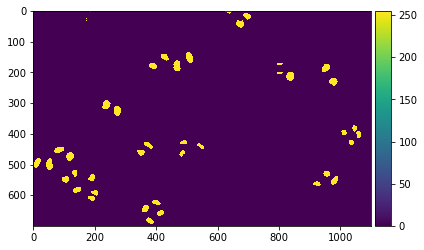

In [34]:
from skimage import io
img1 = io.imread('../BilderDaten/BilderDaten/N2DL-HeLa/img/t13.tif')
io.imshow(otsu_thresholding_vek(img1))